# Exploring the Cityscapes dataset

In this Jupyter Notebook we explore the Cityscapes dataset making use of the dataloader [cityscapesDataset](./datasets/cityscapes.py).

In [1]:
!pip install cityscapesscripts


## Imports
We make use of the [cityscapesscripts package](https://github.com/mcordts/cityscapesScripts) to download the files. It is necessary to provide a *username* and *password* to download the dataset. 

In [1]:
import os
import zipfile
from importlib import reload
from os.path import join as pjoin
from datasets.cityscapes import cityscapesDataset
from cityscapesscripts.download import downloader 
from torchvision import transforms

In [2]:
local_path = "./Cityscapes"
pckgs_names = ["gtFine_trainvaltest.zip","leftImg8bit_trainvaltest.zip"]
dir_names = ["gtFine", "leftImg8bit"]

### Download the dataset

In order to obtain them, go to the [Cityscapes dataset webpage](https://www.cityscapes-dataset.com/register/) and register. Once you have register, execute the next cell to log in.

In [3]:
session = downloader.login()

In [4]:
# Download zip files
for pckg_name in pckgs_names:
    if not os.path.isfile(pckg_name):
        session = downloader.login()
        downloader.download_packages(session=session, package_names=[pckg_name], destination_path="./")
        
# Extract zip files 
for dir_name in dir_names:
    if not os.path.isdir(pjoin(local_path, dir_name)):
        with zipfile.ZipFile(pckg_name, "r") as zip_file:
            zip_file.extractall(local_path)

### Load the dataset

In [19]:
training_data = cityscapesDataset(local_path, split="train")
validation_data = cityscapesDataset(local_path, split="val")
test_data = cityscapesDataset(local_path, split="test")

Annotations files processed
Annotations files processed
Annotations files processed


### Explore the dataset

In [6]:
dataset_sizes = {
    'train': len(training_data),
    'val': len(validation_data),
    'test': len(test_data),
    'total': len(training_data) + len(validation_data) + len(test_data)
}

dataset_sizes

{'train': 2975, 'val': 500, 'test': 1525, 'total': 5000}

In [7]:
img, label = training_data[5]

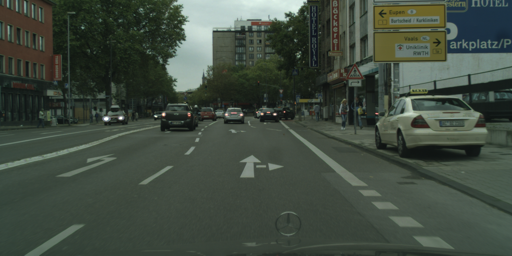

In [8]:
img = transforms.ToPILImage()(img).convert("RGB")
img

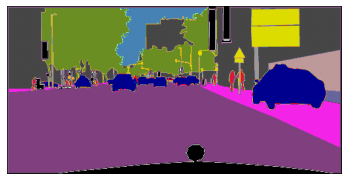

In [9]:
training_data.decode_segmap(label.numpy(), plot=True)

#### Training label ids 
Labels *-1* and *255* shall be ignored.

In [20]:
training_data.label_ids()

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 255]

#### Training label colours

In [21]:
training_data.label_colours()

{255: (0, 0, 0),
 0: (128, 64, 128),
 1: (244, 35, 232),
 2: (70, 70, 70),
 3: (102, 102, 156),
 4: (190, 153, 153),
 5: (153, 153, 153),
 6: (250, 170, 30),
 7: (220, 220, 0),
 8: (107, 142, 35),
 9: (152, 251, 152),
 10: (70, 130, 180),
 11: (220, 20, 60),
 12: (255, 0, 0),
 13: (0, 0, 142),
 14: (0, 0, 70),
 15: (0, 60, 100),
 16: (0, 80, 100),
 17: (0, 0, 230),
 18: (119, 11, 32),
 -1: (0, 0, 142)}

#### Training label names

In [22]:
training_data.label_names()

{255: 'unlabeled',
 0: 'road',
 1: 'sidewalk',
 2: 'building',
 3: 'wall',
 4: 'fence',
 5: 'pole',
 6: 'traffic light',
 7: 'traffic sign',
 8: 'vegetation',
 9: 'terrain',
 10: 'sky',
 11: 'person',
 12: 'rider',
 13: 'car',
 14: 'truck',
 15: 'bus',
 16: 'train',
 17: 'motorcycle',
 18: 'bicycle',
 -1: 'license plate'}